In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [52]:
dataset = pd.read_csv("Train.csv")

In [53]:
dataset.shape

(40000, 2)

In [54]:
dataset.head()

,review,label
0,mature intelligent and highly charged melodram...,pos
1,http://video.google.com/videoplay?docid=211772...,pos
2,Title: Opera (1987) Director: Dario Argento Ca...,pos
3,I think a lot of people just wrote this off as...,pos
4,This is a story of two dogs and a cat looking ...,pos


In [55]:
dataset['label'].value_counts()

label
pos    20011
neg    19989
Name: count, dtype: int64

In [56]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [57]:
y = dataset['label'].values

In [58]:
y = le.fit_transform(y)

In [59]:
y[:100]

array([1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0])

In [60]:
dataset['review'][11]

'Robert Jordan is a television star. Robert Jordan likes things orderly, on time and properly executed. In his world children are to be seen, not heard. So why would Mr. Jordan want to become the master of a rambunctious band of Boy Scouts? Ratings. His staff figures that if learns how to interact with the youth, they will be more inclined to watch his show. Of course watching Jordan cope comprises most of the fun.<br /><br />Like Mr. Belvedere and Mr. Belvedere Goes to College this one is sure to please.<br /><br />ANYONE INTERESTED IN OBTAINING A COPY OF THIS FILM PLEASE WRITE TO ME AT: IAMASEAL2@YAHOO.COM'

In [61]:
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

In [62]:
sw = set(stopwords.words('english'))
ps = PorterStemmer()

In [63]:
def clean_text(sample):
    sample = sample.lower()
    sample = sample.replace("<br /><br />", "")
    sample = re.sub("[^a-zA-Z]+", " ", sample)
    
    sample = sample.split()
    
    sample = [ps.stem(s) for s in sample if s not in sw] # list comprehension
    
    sample = " ".join(sample)
    
    return sample

In [64]:
clean_text(dataset['review'][11])

'robert jordan televis star robert jordan like thing orderli time properli execut world children seen heard would mr jordan want becom master rambuncti band boy scout rate staff figur learn interact youth inclin watch show cours watch jordan cope compris fun like mr belveder mr belveder goe colleg one sure pleas anyon interest obtain copi film pleas write iamas yahoo com'

In [65]:
dataset['review'][11]

'Robert Jordan is a television star. Robert Jordan likes things orderly, on time and properly executed. In his world children are to be seen, not heard. So why would Mr. Jordan want to become the master of a rambunctious band of Boy Scouts? Ratings. His staff figures that if learns how to interact with the youth, they will be more inclined to watch his show. Of course watching Jordan cope comprises most of the fun.<br /><br />Like Mr. Belvedere and Mr. Belvedere Goes to College this one is sure to please.<br /><br />ANYONE INTERESTED IN OBTAINING A COPY OF THIS FILM PLEASE WRITE TO ME AT: IAMASEAL2@YAHOO.COM'

In [66]:
dataset['cleaned_review'] =  dataset['review'].apply(clean_text)

In [67]:
corpus = dataset['cleaned_review'].values

In [68]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

In [69]:
cv = CountVectorizer(max_df = 0.5, max_features=50000)

In [70]:
X = cv.fit_transform(corpus)

In [71]:
print(X[0])

  (0, 25164)	1
  (0, 20844)	1
  (0, 19380)	1
  (0, 5614)	1
  (0, 25586)	1
  (0, 44630)	1
  (0, 5865)	1
  (0, 47635)	2
  (0, 39858)	2
  (0, 29479)	1
  (0, 24065)	1
  (0, 43631)	1
  (0, 36914)	1
  (0, 35377)	1
  (0, 24500)	1
  (0, 41060)	1


In [72]:
tfidf = TfidfTransformer()

In [73]:
X = tfidf.fit_transform(X)

In [74]:
print(X[0])

  (0, 47635)	0.6321513717388632
  (0, 44630)	0.3746519680247996
  (0, 43631)	0.23311910175629735
  (0, 41060)	0.08954711515364625
  (0, 39858)	0.3479272455598334
  (0, 36914)	0.12838776347304318
  (0, 35377)	0.06795826262376209
  (0, 29479)	0.09772985843350443
  (0, 25586)	0.20294441928431647
  (0, 25164)	0.19660242704458164
  (0, 24500)	0.1861194711304735
  (0, 24065)	0.08393204950822558
  (0, 20844)	0.1534465249461136
  (0, 19380)	0.14306353810192265
  (0, 5865)	0.21267493705986773
  (0, 5614)	0.18757256999458938


In [75]:
X.shape

(40000, 50000)

In [76]:
y.shape

(40000,)

In [77]:
from keras import models
from keras.layers import Dense

In [78]:
model = models.Sequential()
model.add( Dense(16, activation="relu", input_shape = (X.shape[1],) ) )
model.add( Dense(16, activation="relu") )
model.add( Dense(1, activation="sigmoid"))

c:\Users\azadr.MSI\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [79]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 16)             │       800,016 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 800,305 (3.05 MB)

 Trainable params: 800,305 (3.05 MB)

 Non-trainable params: 0 (0.00 B)

In [80]:
model.compile(optimizer='rmsprop', loss="binary_crossentropy", metrics=['accuracy'])

In [81]:
X_val = X[:5000]
X_train = X[5000:]

y_val = y[:5000]
y_train = y[5000:]

In [82]:
X_train.shape, y_train.shape

((35000, 50000), (35000,))

In [83]:
from keras.utils import Sequence

class SparseMatrixGenerator(Sequence):
    def __init__(self, X_sparse, y, batch_size):
        self.X_sparse = X_sparse
        self.y = y
        self.batch_size = batch_size
        self.indices = np.arange(X_sparse.shape[0])

    def __len__(self):
        return int(np.ceil(len(self.indices) / self.batch_size))

    def __getitem__(self, idx):
        batch_indices = self.indices[idx * self.batch_size:(idx + 1) * self.batch_size]
        X_batch = self.X_sparse[batch_indices].toarray()
        y_batch = self.y[batch_indices]
        return X_batch, y_batch

sparse_generator = SparseMatrixGenerator(X, y, batch_size=128)
sparse_val_generator = SparseMatrixGenerator(X_val, y_val, batch_size=128)

hist = model.fit(sparse_generator, epochs=2, validation_data=sparse_val_generator)


Epoch 1/2


  3/313 ━━━━━━━━━━━━━━━━━━━━ 8s 29ms/step - accuracy: 0.4596 - loss: 0.6933   

c:\Users\azadr.MSI\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


313/313 ━━━━━━━━━━━━━━━━━━━━ 12s 35ms/step - accuracy: 0.7658 - loss: 0.6047 - val_accuracy: 0.9076 - val_loss: 0.2690
Epoch 2/2
313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 33ms/step - accuracy: 0.9046 - loss: 0.2502 - val_accuracy: 0.9326 - val_loss: 0.1819


In [84]:
result = hist.history

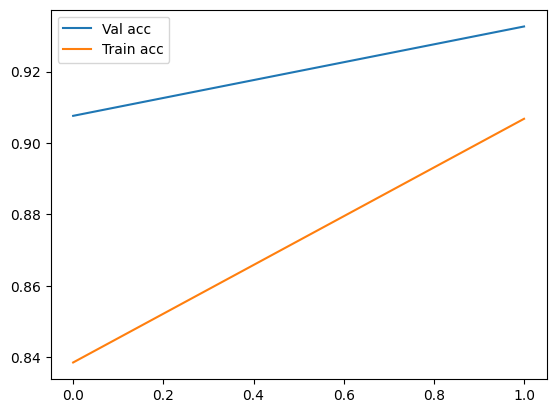

In [85]:
plt.plot(result['val_accuracy'], label = "Val acc")
plt.plot(result['accuracy'], label = "Train acc")
plt.legend()
plt.show()

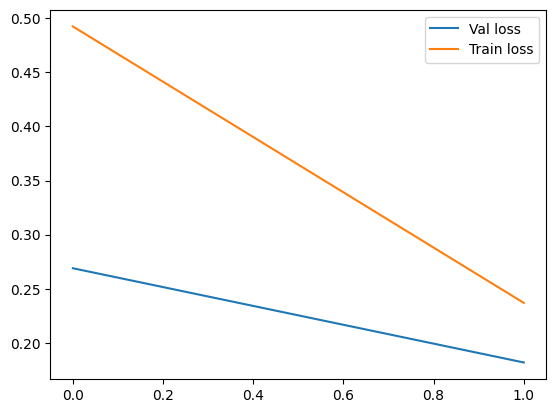

In [86]:
plt.plot(result['val_loss'], label = "Val loss")
plt.plot(result['loss'], label = "Train loss")
plt.legend()
plt.show()

In [87]:
from keras.utils import Sequence

class SparseMatrixGenerator(Sequence):
    def __init__(self, X_sparse, y, batch_size):
        self.X_sparse = X_sparse
        self.y = y
        self.batch_size = batch_size
        self.indices = np.arange(X_sparse.shape[0])

    def __len__(self):
        return int(np.ceil(len(self.indices) / self.batch_size))

    def __getitem__(self, idx):
        batch_indices = self.indices[idx * self.batch_size:(idx + 1) * self.batch_size]
        X_batch = self.X_sparse[batch_indices].toarray()
        y_batch = self.y[batch_indices]
        return X_batch, y_batch

sparse_val_generator = SparseMatrixGenerator(X_val, y_val, batch_size=128)

evaluation = model.evaluate(sparse_val_generator)


40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9335 - loss: 0.1762


In [88]:
test = pd.read_csv("D:\Semester 6\Python\Test.csv")

<>:1: SyntaxWarning: invalid escape sequence '\S'
<>:1: SyntaxWarning: invalid escape sequence '\S'
C:\Users\azadr.MSI\AppData\Local\Temp\ipykernel_1660\2580060712.py:1: SyntaxWarning: invalid escape sequence '\S'
  test = pd.read_csv("D:\Semester 6\Python\Test.csv")


In [89]:
test.shape

(10000, 1)

In [90]:
test.head()

,review
0,Remember those old kung fu movies we used to w...
1,This movie is another one on my List of Movies...
2,How in the world does a thing like this get in...
3,"""Queen of the Damned"" is one of the best vampi..."
4,The Caprica episode (S01E01) is well done as a...


In [91]:
test['cleaned_review'] = test['review'].apply(clean_text)

In [92]:
X_test = test['cleaned_review']

In [93]:
X_test = cv.transform(X_test)

In [94]:
X_test.shape

(10000, 50000)

In [95]:
X_test = tfidf.transform(X_test)

In [96]:
class SparseMatrixGenerator(Sequence):
    def __init__(self, X_sparse, batch_size):
        self.X_sparse = X_sparse
        self.batch_size = batch_size
        self.indices = np.arange(X_sparse.shape[0])

    def __len__(self):
        return int(np.ceil(len(self.indices) / self.batch_size))

    def __getitem__(self, idx):
        batch_indices = self.indices[idx * self.batch_size:(idx + 1) * self.batch_size]
        X_batch = self.X_sparse[batch_indices].toarray()
        return X_batch

sparse_test_generator = SparseMatrixGenerator(X_test, batch_size=128)

# Predict on batches of data
y_pred_batches = []
for i in range(len(sparse_test_generator)):
    X_batch = sparse_test_generator[i]
    y_pred_batch = model.predict(X_batch)
    y_pred_batches.append(y_pred_batch)

# Concatenate predictions from all batches
y_pred = np.concatenate(y_pred_batches)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━

In [97]:
y_pred[ y_pred >= 0.5 ]  =  1

In [98]:
y_pred = y_pred.astype('int')

In [99]:
y_pred[:10]

array([[0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1]])

In [100]:
dic = {0 : 'neg' , 1 : 'pos'}
y_pred = [ dic[p[0]] for p in y_pred ]

In [101]:
ids = np.arange(10000)

In [102]:
final_matrix = np.stack((ids, y_pred), axis =1)

In [103]:
df = pd.DataFrame(final_matrix, columns=['Id', 'label'])

In [104]:
df.to_csv("y_pred.csv", index = False)

In [105]:
df

,Id,label
0,0,neg
1,1,neg
2,2,neg
3,3,pos
4,4,pos
...,...,...
9995,9995,neg
9996,9996,pos
9997,9997,pos
9998,9998,pos


In [106]:
from keras.models import Sequential
from keras.layers import Dense
from keras.models import save_model

save_model(model, 'your_model_file.h5')